# Olympic Athletes Dataset Overview & EDA Notebook

## 1. Introduction

This notebook provides an **overview and exploratory data analysis (EDA)** of the historical Olympic athletes dataset (1896–2016).  
The goal is to understand the structure of the dataset, describe its main variables, and identify patterns and relationships that may be useful for **classification tasks** in later notebooks.

**Group Members:**
- Pedro Ribeiro — 27960  
- Ricardo Fernandes — 27961  
- Carolina Branco — 27983  
- João Barbosa — 27964  
- Diogo Abreu — 27975  

---

## 2. Business Goals

The main objectives of this analysis are:

1. Explore historical trends in Olympic participation, medal distribution, athlete demographics, and sports performance.  
2. Identify relationships between features that may be relevant for **predictive modeling**, such as:
   - Predicting the type of medal won (Gold, Silver, Bronze)  
   - Predicting an athlete’s likelihood of winning a medal based on age, sport, or country  
3. Provide insights for sports analysts, statisticians, and researchers interested in Olympic trends.

---

## 3. Dataset Description

The dataset contains information about **Olympic athletes and events from 1896 to 2016**.  
It includes tens of thousands of rows (one per athlete per event) and the following attributes:

### Dataset Metadata

| Attribute       | Type        | Description                                        | Role            |
|-----------------|------------|----------------------------------------------------|----------------|
| ID              | Numeric     | Athlete identifier                                 | id / auxiliary |
| Name            | Categorical | Athlete full name                                  | input          |
| Sex             | Categorical | Male or Female                                     | input          |
| Age             | Numeric     | Age of the athlete                                 | input          |
| Height          | Numeric     | Height in centimeters                               | input          |
| Weight          | Numeric     | Weight in kilograms                                 | input          |
| Team            | Categorical | National team                                      | input          |
| NOC             | Categorical | National Olympic Committee code                     | input          |
| Games           | Categorical | Year and season of the Olympics (e.g., 1992 Summer) | input          |
| Year            | Numeric     | Year of the Olympic Games                           | input          |
| Season          | Categorical | Summer or Winter                                   | input          |
| City            | Categorical | Host city                                         | input          |
| Sport           | Categorical | Sport category                                    | input          |
| Event           | Categorical | Specific event                                    | input          |
| Medal           | Categorical | Medal won (Gold, Silver, Bronze, or NA)          | target         |

**Source:** [Kaggle – 120 Years of Olympic History](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

---

## 4. Load Dataset

In [ ]:
# Linear algebra and data processing
import numpy as np
import pandas as pd

# Graphics / Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load CSV
olympic_df = pd.read_csv("athlete_events.csv")

### 4.1 Load and Check Data

In [21]:
# Load the Olympics dataset

olympic_df = pd.read_csv('athlete_events.csv')  

print("Number of rows in the dataset:", len(olympic_df))

Number of rows in the dataset: 271116


### 4.2 Variable Description

In [4]:
# Print top examples of the dataset
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Display basic information about the DataFrame
print(olympic_df.info())

# Display descriptive statistics for numerical features
print(olympic_df.describe())

# Display unique values for categorical features
for column in olympic_df.columns:
    if olympic_df[column].dtype == object:
        print(f"\nUnique values for {column}:")
        print(olympic_df[column].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898 

### 4.3 Clean and Transform Data

In [22]:
# Replace NaN with 'None'
olympic_df['Medal'] = olympic_df['Medal'].fillna('None')

# Verify replacement
print("\nUpdated Medal value counts:")
display(olympic_df['Medal'].value_counts())


Updated Medal value counts:


Medal
None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

### 4.4 Find Missing Values

In [6]:
# Display number of missing values per column
missing_values = olympic_df.isnull().sum()
missing_percentage = (missing_values / len(olympic_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

display(missing_df)

# Example: show first rows with missing Age
print(f"\nAge has {olympic_df['Age'].isnull().sum()} null values")
display(olympic_df[olympic_df['Age'].isnull()].head())

# Example: show first rows with missing Medal
print(f"\nMedal has {olympic_df['Medal'].isnull().sum()} null values")
display(olympic_df[olympic_df['Medal'].isnull()].head())


,Missing Values,Percentage
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
Sex,0,0.000000
ID,0,0.000000
Name,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Year,0,0.000000



Age has 9474 null values


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN



Medal has 231333 null values


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


### 4.5 Univariate Variable Analysis - Categorical Variables

In [7]:
# Get the categorical variables from the Olympic dataset
categorical_features = [feature for feature in olympic_df.columns if olympic_df[feature].dtype == object]
print("Categorical features:", categorical_features)

Categorical features: ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [8]:
def bar_plot(variable):
    """
        input: variable name, e.g., "Sex" or "Team"
        output: bar plot & value counts
    """
    # get the feature
    var = olympic_df[variable]
    # count number of categorical variable values
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(12,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=60)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    # print value counts
    print(f"{variable}:\n{varValue}")


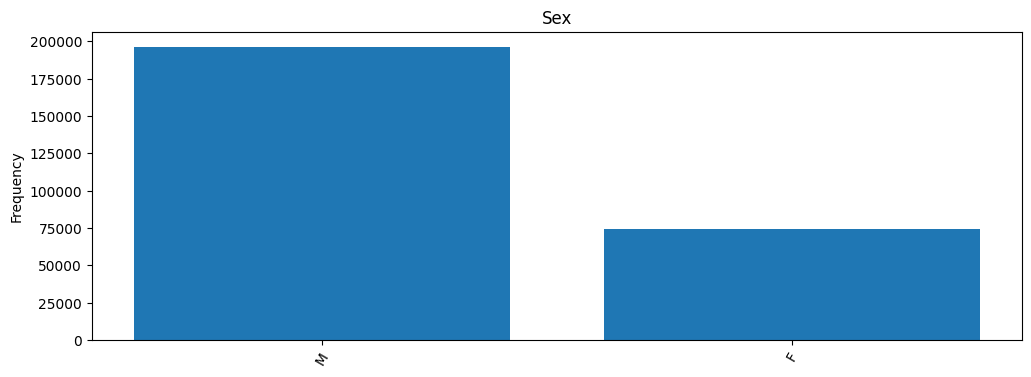

Sex:
Sex
M    196594
F     74522
Name: count, dtype: int64


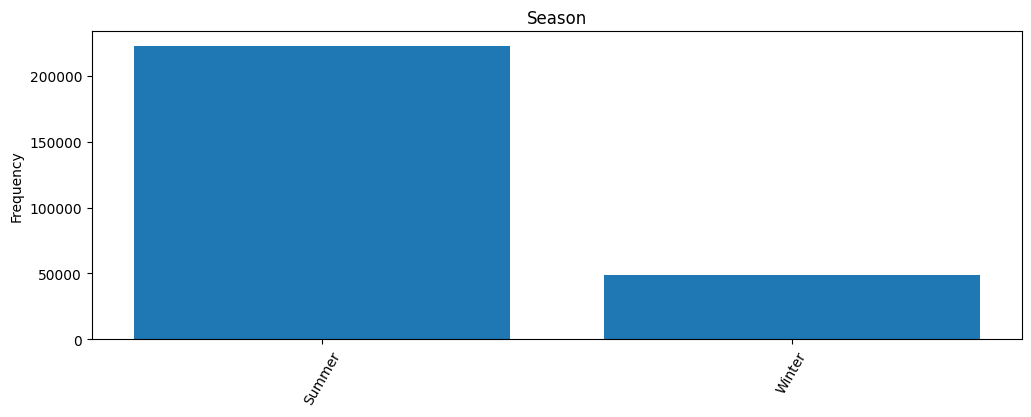

Season:
Season
Summer    222552
Winter     48564
Name: count, dtype: int64


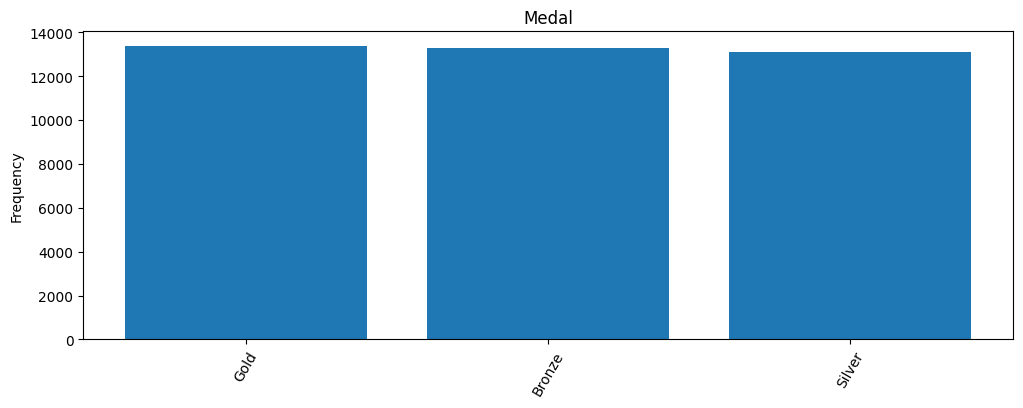

Medal:
Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [9]:
# Plot categorical features with less than 20 distinct values
for cf in categorical_features:
    if olympic_df[cf].nunique() < 20:
        bar_plot(cf)

In [11]:
# Print value counts for categorical features with 19 or more distinct values
for cf in categorical_features:
    if olympic_df[cf].nunique() >= 19:
        print(f"\n{cf} value counts:\n")
        print(olympic_df[cf].value_counts())



Name value counts:

Name
Robert Tait McKenzie          58
Heikki Ilmari Savolainen      39
Joseph "Josy" Stoffel         38
Ioannis Theofilakis           36
Takashi Ono                   33
                              ..
James Francis "Jim" Zylker     1
Yury Ivanovich Zyabrev         1
Victor Andrew "Vic" Zwolak     1
Werner Zwimpfer                1
Edgar Lindenau Aabye           1
Name: count, Length: 134732, dtype: int64

Team value counts:

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Danzig               1
Hamburg              1
Formosa              1
Camille              1
Cuxhaven             1
Name: count, Length: 1184, dtype: int64

NOC value counts:

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

Games value counts:

Games
2000 Summer    1

### 4.6 Univariate Variable Analysis - Numerical variables

In [14]:
# Function to visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize=(10,4))
    plt.hist(olympic_df[variable].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with histogram")
    plt.show()

In [12]:
# Get the numerical variables from superbowl_df
numerical_features = [feature for feature in olympic_df.columns if olympic_df[feature].dtype != object]
print("Numerical features:", numerical_features)

Numerical features: ['ID', 'Age', 'Height', 'Weight', 'Year']


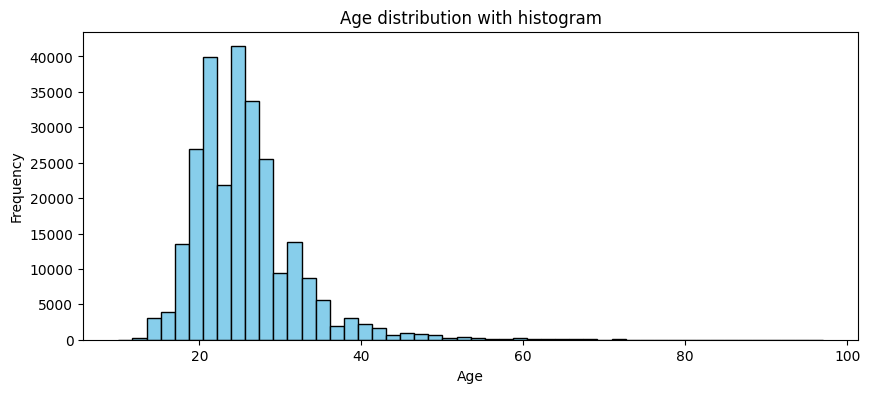

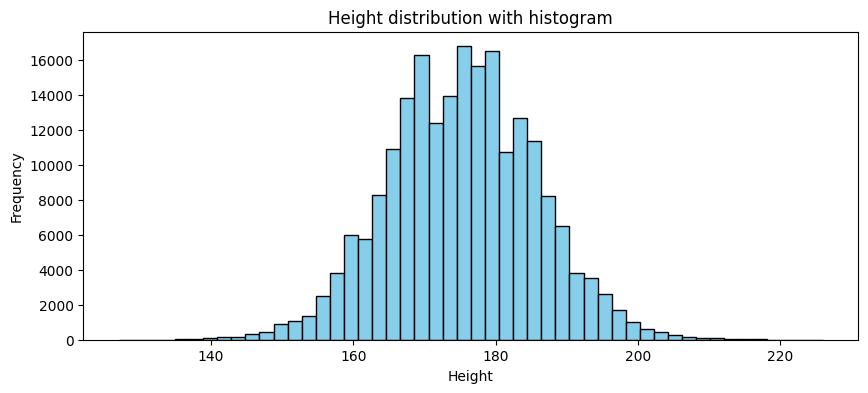

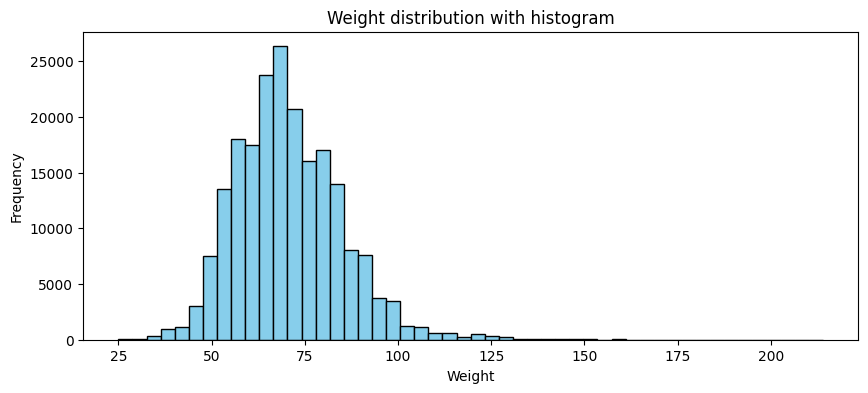

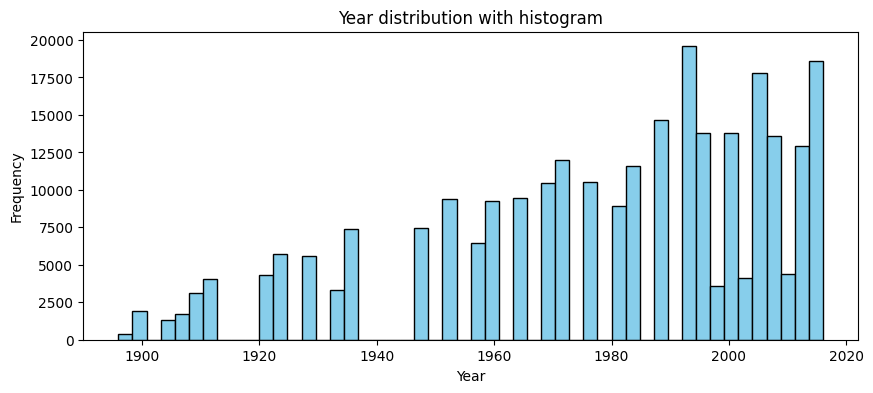

In [15]:
# Columns to exclude from numerical distribution plots
removed_nf = ['ID', 'Name']  # unique identifiers, not useful for distribution plots

# Plot histograms for numerical features
for nf in numerical_features:
    if nf not in removed_nf:
        plot_hist(nf)

### 4.7 Basic Data Analysis 

#### Bivariate analysis examples

- Medal - Sex
- Medal - Season
- Medal - Sport
- Medal - Team

In [16]:
# Medal vs Sex
print("Medal vs Sex")
display(pd.crosstab(olympic_df['Medal'], olympic_df['Sex']))

# Medal vs Season
print("\nMedal vs Season")
display(pd.crosstab(olympic_df['Medal'], olympic_df['Season']))

# Medal vs Sport (Top 10 sports by number of athletes)
top_sports = olympic_df['Sport'].value_counts().head(10).index
print("\nMedal vs Sport (Top 10 Sports)")
display(pd.crosstab(olympic_df[olympic_df['Sport'].isin(top_sports)]['Medal'],
                    olympic_df[olympic_df['Sport'].isin(top_sports)]['Sport']))

# Medal vs Team (Top 10 Teams by number of athletes)
top_teams = olympic_df['Team'].value_counts().head(10).index
print("\nMedal vs Team (Top 10 Teams)")
display(pd.crosstab(olympic_df[olympic_df['Team'].isin(top_teams)]['Medal'],
                    olympic_df[olympic_df['Team'].isin(top_teams)]['Team']))


Medal vs Sex


Sex,F,M
Medal,,
Bronze,3771,9524
Gold,3747,9625
None,63269,168064
Silver,3735,9381



Medal vs Season


Season,Summer,Winter
Medal,,
Bronze,11409,1886
Gold,11459,1913
None,188464,42869
Silver,11220,1896



Medal vs Sport (Top 10 Sports)


Sport,Alpine Skiing,Athletics,Cross Country Skiing,Cycling,Fencing,Gymnastics,Rowing,Shooting,Swimming,Wrestling
Medal,,,,,,,,,,
Bronze,141,1296,263,414,566,719,990,407,956,468
Gold,143,1339,256,424,594,791,978,410,1099,413
None,8401,34655,8357,9596,8992,24451,7650,10220,20147,5858
Silver,144,1334,257,425,583,746,977,411,993,415



Medal vs Team (Top 10 Teams)


Team,Australia,Canada,France,Germany,Great Britain,Hungary,Italy,Japan,Sweden,United States
Medal,,,,,,,,,,
Bronze,511,408,577,678,572,365,484,357,507,1233
Gold,342,422,455,679,519,432,535,247,451,2474
None,6207,8036,10438,7342,9731,5420,8733,7378,6618,12628
Silver,453,413,518,627,582,330,508,307,476,1512


### 4.8 Visualization

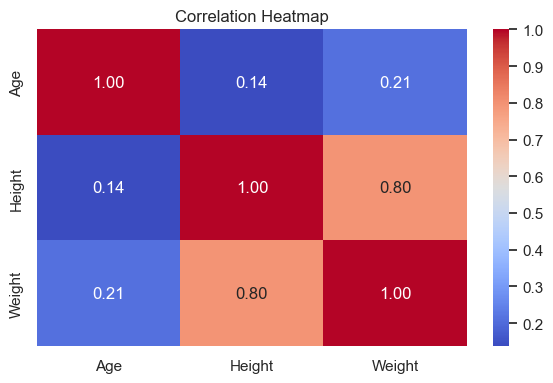

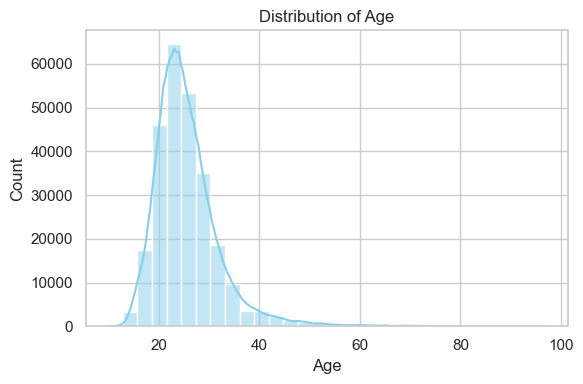

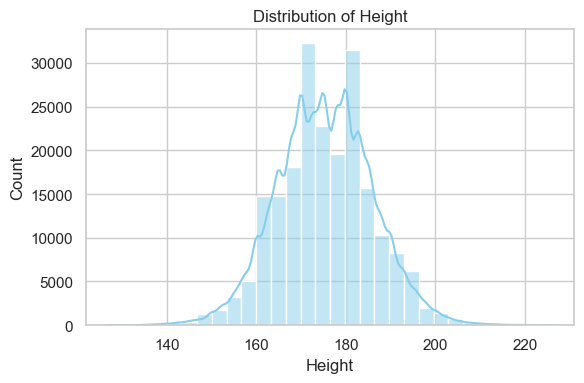

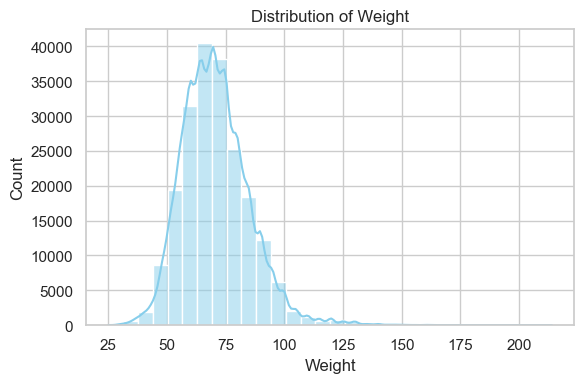

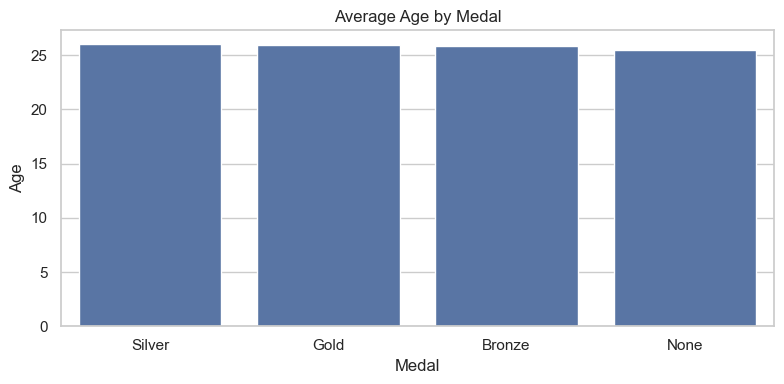

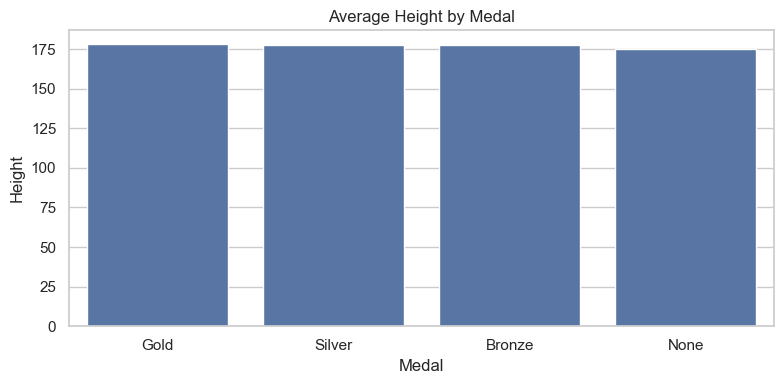

In [17]:
sns.set(style="whitegrid")

# ============================
# 1. Correlation Heatmap
# ============================
numerical_features = ["Age", "Height", "Weight"]

plt.figure(figsize=(6,4))
sns.heatmap(
    olympic_df[numerical_features].corr(),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ============================
# 2. Distribution of Age
# ============================
plt.figure(figsize=(6,4))
sns.histplot(olympic_df["Age"].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.tight_layout()
plt.show()

# ============================
# 3. Distribution of Height
# ============================
plt.figure(figsize=(6,4))
sns.histplot(olympic_df["Height"].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Height")
plt.tight_layout()
plt.show()

# ============================
# 4. Distribution of Weight
# ============================
plt.figure(figsize=(6,4))
sns.histplot(olympic_df["Weight"].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Weight")
plt.tight_layout()
plt.show()

# ============================
# 5. Average Age by Medal
# ============================
age_medal = olympic_df.groupby('Medal')['Age'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=age_medal, x='Medal', y='Age')
plt.title("Average Age by Medal")
plt.tight_layout()
plt.show()

# ============================
# 6. Average Height by Medal
# ============================
height_medal = olympic_df.groupby('Medal')['Height'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=height_medal, x='Medal', y='Height')
plt.title("Average Height by Medal")
plt.tight_layout()
plt.show()

### 4.9 Feature Engineering

For the `Team` column, we performed a simplified grouping to make it suitable for classification:

1. Identified the **top 10 teams** by number of athletes.  
2. Grouped all other less frequent teams into a single category called `"Other"`.  
3. Removed the original detailed distribution for rare teams and kept only the simplified `Team` categories.  
4. Applied **one-hot encoding** to convert `Team` into binary features.

This approach reduces noise, prevents overfitting, and will be applied similarly to other categorical attributes such as `Sport`, `Event`, `NOC`, and `City` in subsequent steps.

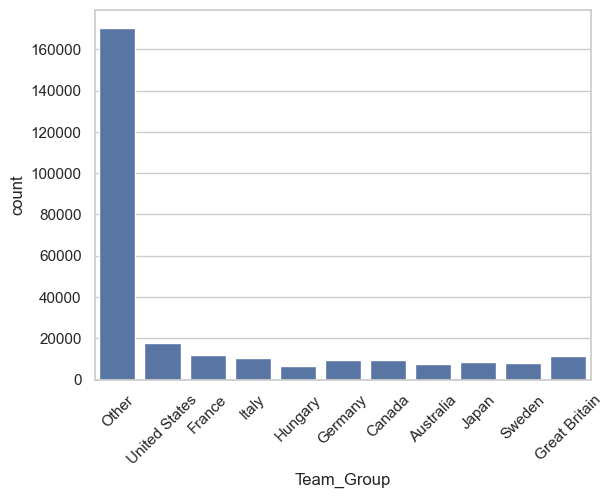

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Team_Group_Canada,Team_Group_France,Team_Group_Germany,Team_Group_Great Britain,Team_Group_Hungary,Team_Group_Italy,Team_Group_Japan,Team_Group_Other,Team_Group_Sweden,Team_Group_United States
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,False,False,False,False,False,False,False,True,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,False,False,False,False,False,False,False,True,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,...,False,False,False,False,False,False,False,True,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,...,False,False,False,False,False,False,False,True,False,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# Inspect first Teams
olympic_df["Team"].head(10)

# Group rare Teams into "Other" (keep only top 10 most frequent)
top_teams = olympic_df["Team"].value_counts().nlargest(10).index
olympic_df["Team_Group"] = olympic_df["Team"].apply(lambda x: x if x in top_teams else "Other")
olympic_df["Team_Group"].head(10)

# Count plot of Team_Group
sns.countplot(x="Team_Group", data=olympic_df)
plt.xticks(rotation=45)
plt.show()

# Remove original Team column, keep only simplified Team_Group
olympic_df.drop(labels=["Team"], axis=1, inplace=True)

# One-hot encoding Team_Group
olympic_df = pd.get_dummies(olympic_df, columns=["Team_Group"])
olympic_df.head()


### 4.10 Outlier Detection

In [24]:
from collections import Counter
import numpy as np

# Function to detect outliers based on IQR method
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c].dropna(), 25)
        # 3rd quartile
        Q3 = np.percentile(df[c].dropna(), 75)
        # Interquartile range
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count occurrences and consider rows that are outliers in more than one feature
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

# Columns to check for outliers
numerical_features = ["Age", "Height", "Weight"]

# Find outliers
outliers = olympic_df.loc[detect_outliers(olympic_df, numerical_features)]
display(outliers)

# Drop outliers
olympic_df = olympic_df.drop(detect_outliers(olympic_df, numerical_features), axis=0).reset_index(drop=True)


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Team_Group_Canada,Team_Group_France,Team_Group_Germany,Team_Group_Great Britain,Team_Group_Hungary,Team_Group_Italy,Team_Group_Japan,Team_Group_Other,Team_Group_Sweden,Team_Group_United States
1859,1021,"Eduardo ""Bto"" Adriana",M,47.0,176.0,120.0,AHO,1972 Summer,1972,Summer,...,False,False,False,False,False,False,False,True,False,False
4329,2469,Virgilijus Alekna,M,40.0,200.0,130.0,LTU,2012 Summer,2012,Summer,...,False,False,False,False,False,False,False,True,False,False
8102,4476,Patrick R. Antaki,M,41.0,185.0,127.0,LIB,2006 Winter,2006,Winter,...,False,False,False,False,False,False,False,True,False,False
10429,5702,Igor Vyacheslavovich Astapkovich,M,41.0,192.0,120.0,BLR,2004 Summer,2004,Summer,...,False,False,False,False,False,False,False,True,False,False
13015,7081,Steven Feico Alle Bakker,M,39.0,200.0,120.0,NED,1988 Summer,1988,Summer,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270120,135138,Rajko ii,M,25.0,210.0,110.0,YUG,1980 Summer,1980,Summer,...,False,False,False,False,False,False,False,True,False,False
270121,135138,Rajko ii,M,29.0,210.0,110.0,YUG,1984 Summer,1984,Summer,...,False,False,False,False,False,False,False,True,False,False
270740,135401,Eurelijus ukauskas,M,22.0,218.0,115.0,LTU,1996 Summer,1996,Summer,...,False,False,False,False,False,False,False,True,False,False
270741,135401,Eurelijus ukauskas,M,27.0,218.0,115.0,LTU,2000 Summer,2000,Summer,...,False,False,False,False,False,False,False,True,False,False
